In [382]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import pandas as pd

C:\Users\User\AppData\Local\Temp\ipykernel_10500\1336025113.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [383]:
train_data = pd.read_csv("./titanic/train.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [384]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Numerical features
We are going to make EDA on the data before performing data cleaning

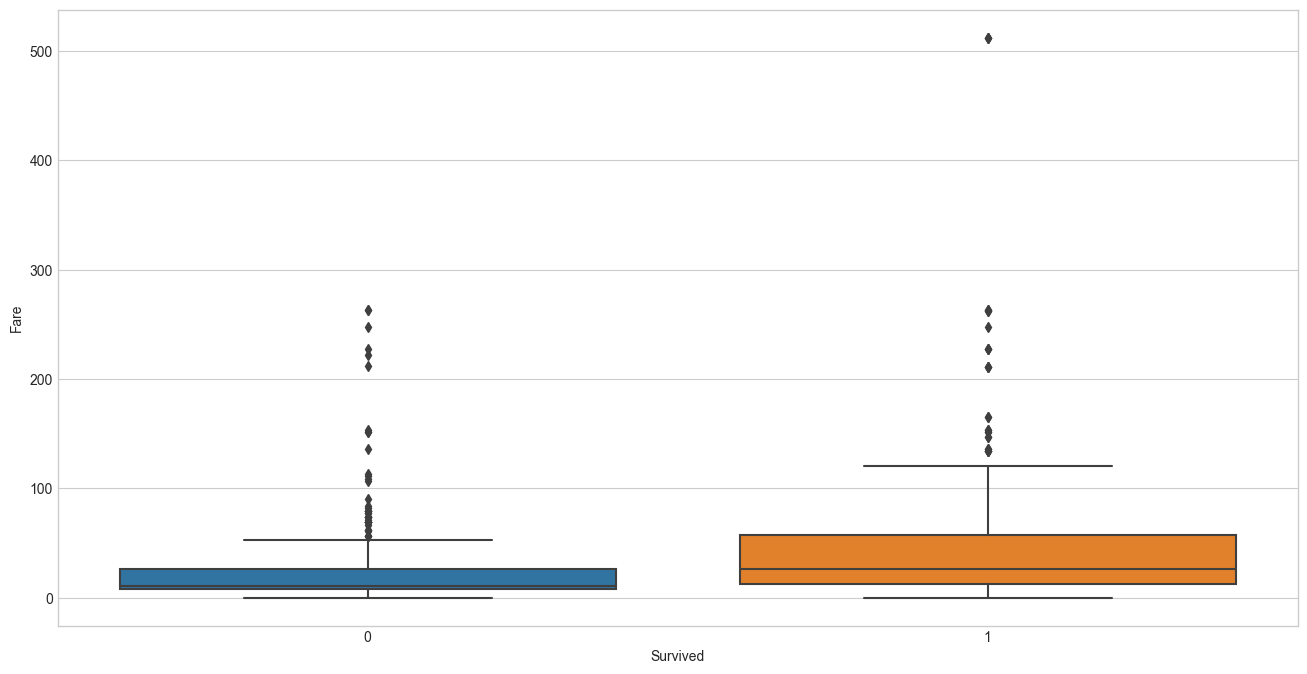

In [385]:
data = pd.concat([train_data['Survived'], train_data['Fare']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=train_data['Survived'], y=train_data['Fare'], data=data)


We can tell from the above figure that there is one person that survived with a fare around 500 <br />
Hence we assume outliers for fares to be any fare > 500

In [386]:
train_data[train_data['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [387]:
# Calculate the mean excluding values greater than 500
mean_without_outliers_train = train_data.loc[train_data['Fare'] <= 500, 'Fare'].mean()

# Replace values greater than 500 with the calculated mean
train_data.loc[train_data['Fare'] > 500, 'Fare'] = mean_without_outliers_train
    
# Just to make sure that outliers for that column has been removed
train_data[train_data['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### Data cleaning (Numerical features)

In [388]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [389]:
mean_age_train = int(train_data['Age'].mean())

print(f"Mean Age Train: {mean_age_train}")

Mean Age Train: 29


In [390]:
import numpy as np

In [391]:
train_data['Age'] = train_data['Age'].replace(np.nan, mean_age_train)

Do the same with the Fare column

In [392]:
train_data['Fare'] = train_data['Fare'].replace(np.nan, mean_without_outliers_train)

#### Data Cleaning (Categorical features)

In [393]:
# Since most of the Cabin column values are filled with NA's, as reported by train_data.info()
# We are going to drop the Cabin column, and remove any other irrelevant feature

train_data = train_data.drop(['PassengerId','Name','Ticket','Embarked','Cabin'], axis=1)
train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [394]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = train_data[['Age','Fare','SibSp','Parch','Pclass']]
scaler = MinMaxScaler(feature_range=(1,5))
numerical_features = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_features.columns)

train_data = pd.concat([numerical_features,train_data[['Sex','Survived']]],axis='columns')

train_data


,Age,Fare,SibSp,Parch,Pclass,Sex,Survived
0,2.084695,1.110266,1.5,1.000000,5.0,male,0
1,2.888917,2.084157,1.5,1.000000,1.0,female,1
2,2.285750,1.120532,1.0,1.000000,5.0,female,1
3,2.738125,1.807605,1.5,1.000000,1.0,female,1
4,2.738125,1.122433,1.0,1.000000,5.0,male,0
...,...,...,...,...,...,...,...
886,2.336014,1.197719,1.0,1.000000,3.0,male,0
887,1.933903,1.456274,1.0,1.000000,1.0,female,1
888,2.436542,1.356654,1.5,2.333333,5.0,female,0
889,2.285750,1.456274,1.0,1.000000,1.0,male,1


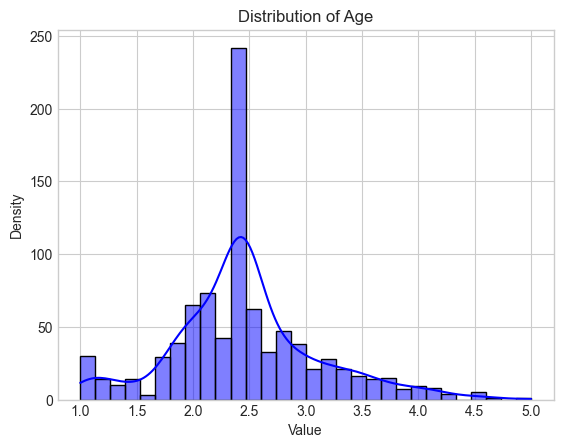

In [395]:
# Create a sample DataFrame
data = train_data['Age']
df = pd.DataFrame(data)

# Choose the column for which you want to plot the distribution
column_to_plot = 'Age'

# Create a distribution plot with KDE using Seaborn
sns.histplot(train_data[column_to_plot], kde=True, color='blue', edgecolor='black')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Distribution of {column_to_plot}')

# Display the plot
plt.show()

In [396]:
# Apply Box-Cox transformation
transformed_feature, lambda_value = boxcox(train_data['Fare'])
transformed_feature

array([0.09002394, 0.30051461, 0.09669711, 0.28017238, 0.09790656,
       0.10180136, 0.27831289, 0.18983169, 0.12534848, 0.22756319,
       0.16520511, 0.21450839, 0.09790656, 0.23160791, 0.09600847,
       0.16077151, 0.2242429 , 0.13996048, 0.17305603, 0.0897721 ,
       0.21228769, 0.13996048, 0.09770587, 0.24434401, 0.18983169,
       0.23197573, 0.0897721 , 0.33660557, 0.09625193, 0.09641341,
       0.21906571, 0.32880922, 0.09499021, 0.12006635, 0.30838898,
       0.27852332, 0.08981443, 0.09790656, 0.17305603, 0.12623549,
       0.11114115, 0.18945012, 0.09641341, 0.25936905, 0.09625193,
       0.09790656, 0.15751178, 0.09499021, 0.19285869, 0.17187945,
       0.25505705, 0.09547953, 0.30474971, 0.21228769, 0.29152879,
       0.24434401, 0.12006635, 0.08981443, 0.2191765 , 0.2700204 ,
       0.08981443, 0.30700126, 0.30918481, 0.21974351, 0.21906571,
       0.15582397, 0.12006635, 0.09894792, 0.09669711, 0.10371772,
       0.12006635, 0.2700204 , 0.30231748, 0.15043181, 0.28490

In [397]:
train_data['Fare'] = transformed_feature
train_data

,Age,Fare,SibSp,Parch,Pclass,Sex,Survived
0,2.084695,0.090024,1.5,1.000000,5.0,male,0
1,2.888917,0.300515,1.5,1.000000,1.0,female,1
2,2.285750,0.096697,1.0,1.000000,5.0,female,1
3,2.738125,0.280172,1.5,1.000000,1.0,female,1
4,2.738125,0.097907,1.0,1.000000,5.0,male,0
...,...,...,...,...,...,...,...
886,2.336014,0.139960,1.0,1.000000,3.0,male,0
887,1.933903,0.227319,1.0,1.000000,1.0,female,1
888,2.436542,0.201271,1.5,2.333333,5.0,female,0
889,2.285750,0.227319,1.0,1.000000,1.0,male,1


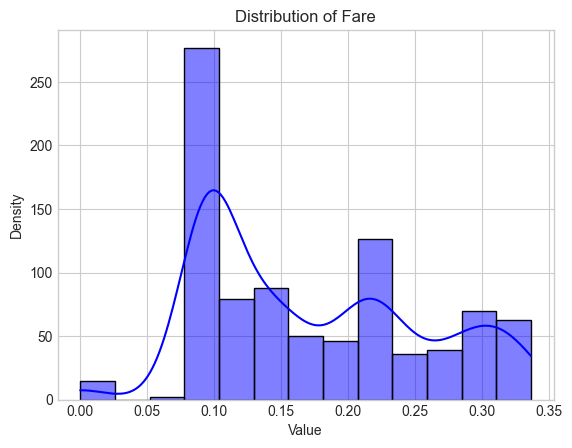

In [398]:
# Create a sample DataFrame
data = train_data['Fare']
df = pd.DataFrame(data)

# Choose the column for which you want to plot the distribution
column_to_plot = 'Fare'

# Create a distribution plot with KDE using Seaborn
sns.histplot(train_data[column_to_plot], kde=True, color='blue', edgecolor='black')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Distribution of {column_to_plot}')

# Display the plot
plt.show()

In [399]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
numerical_features = train_data[['Age','Fare','SibSp','Parch']]

numerical_features_pca = pca.fit_transform(numerical_features)
train_data = train_data.drop(numerical_features.columns, axis='columns')
pca_features = pd.DataFrame(data=numerical_features_pca, columns=['PCA1','PCA2','PCA3'])

train_data = pd.concat([train_data,pca_features],axis='columns')
train_data

,Pclass,Sex,Survived,PCA1,PCA2,PCA3
0,5.0,male,0,0.279841,-0.288787,-0.325649
1,1.0,female,1,-0.293809,0.281512,-0.373111
2,5.0,female,1,-0.126059,-0.390591,0.013158
3,1.0,female,1,-0.185832,0.175839,-0.364288
4,5.0,male,0,-0.451298,-0.077506,-0.013072
...,...,...,...,...,...,...
886,3.0,male,0,-0.161254,-0.352967,0.010072
887,1.0,female,1,0.129779,-0.625448,0.033035
888,5.0,female,0,0.638904,0.672428,0.601258
889,1.0,male,1,-0.123205,-0.381999,0.012637


In [400]:
y = train_data['Survived']
train_data = train_data.drop(['Survived'],axis='columns')
train_data = pd.concat([train_data,y],axis='columns')
train_data

,Pclass,Sex,PCA1,PCA2,PCA3,Survived
0,5.0,male,0.279841,-0.288787,-0.325649,0
1,1.0,female,-0.293809,0.281512,-0.373111,1
2,5.0,female,-0.126059,-0.390591,0.013158,1
3,1.0,female,-0.185832,0.175839,-0.364288,1
4,5.0,male,-0.451298,-0.077506,-0.013072,0
...,...,...,...,...,...,...
886,3.0,male,-0.161254,-0.352967,0.010072,0
887,1.0,female,0.129779,-0.625448,0.033035,1
888,5.0,female,0.638904,0.672428,0.601258,0
889,1.0,male,-0.123205,-0.381999,0.012637,1


In [401]:
train_data.to_csv('updated_train.csv',index=False)